In [55]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import  sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from IPython.display import Image ## to display Image in notebook itself

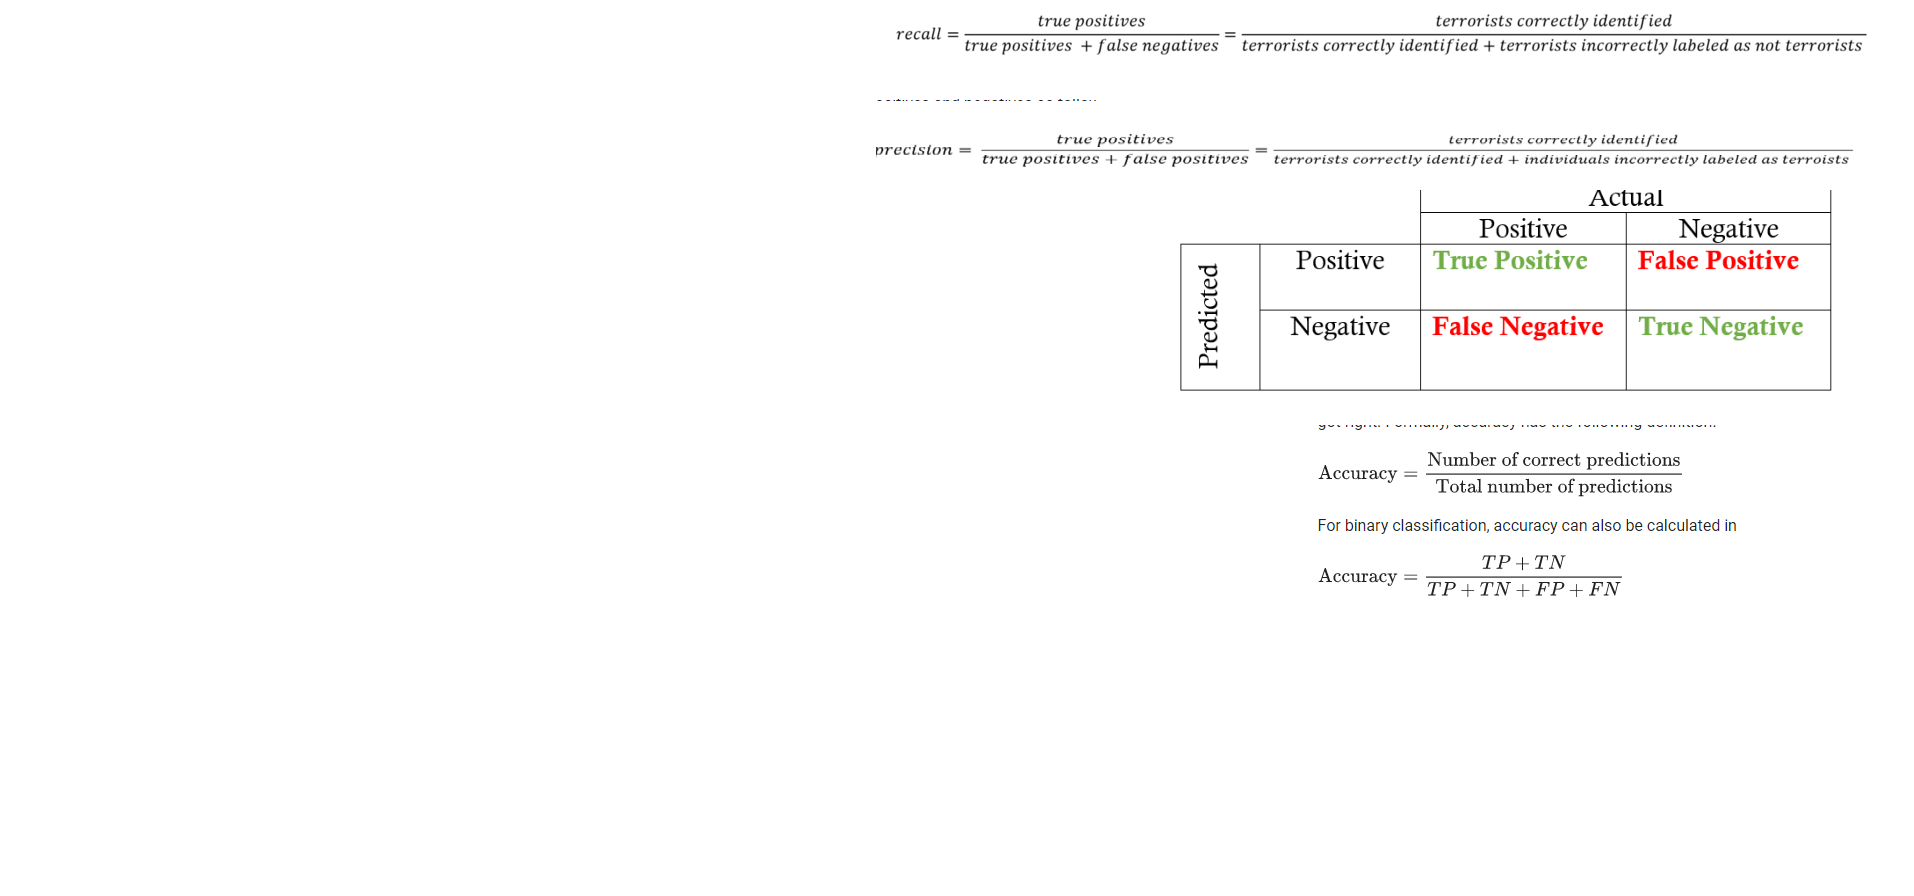

In [56]:
ImageIPythonythonfilename="ConfusionMatrix2.png", width=700,height=400)

In [2]:
data = pd.read_csv("creditcard.csv",header=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


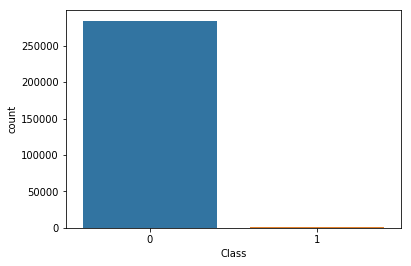

In [8]:
%matplotlib inline
sns.countplot("Class",data=data)

In [23]:
##lets see the class distribution in numbners
print(len(data[data['Class']==1]))
print(len(data[data['Class']==0]))
## note there is huge differnece in distribution of the calss we have vemry less number of defaulted card customer
## percentafe wise lets see that
print("defaulted perc:- "+str((len(data[data['Class']==1])/len(data))*100))
print("normal perc:- "+str((len(data[data['Class']==0])/len(data))*100))

492
284315
defaulted perc:- 0.1727485630620034
normal perc:- 99.82725143693798


In [57]:
def model(classifier,x_train,x_test,y_train,y_test):
    clf = classifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("accuracy :-",metrics.accuracy_score(y_test,y_pred))
    print("precision :-",metrics.precision_score(y_test,y_pred))
    print("recall :-",metrics.recall_score(y_test,y_pred))

In [32]:
## normalize the amount and time colimn in the dataset and reshape to (1-,1)
data["Normalized_Amount"] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
data.drop(["Amount","Time"],axis=1,inplace=True)
data.head()

C:\Users\kumrajni\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [33]:
X = data.ix[:,data.columns!="Class"]
y = data["Class"]
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=20)

In [39]:
model(LogisticRegression,x_train,x_test,y_train,y_test)

0.9991994606893064
0.8333333333333334
0.5963302752293578


In [40]:
model(SVC,x_train,x_test,y_train,y_test)

0.9994663071262043
0.9382716049382716
0.6972477064220184


In [41]:
model(RandomForestClassifier,x_train,x_test,y_train,y_test)

0.9995646189713772
0.9431818181818182
0.7614678899082569


In [43]:
type(y.head())

pandas.core.series.Series

In [46]:
## SMOTE
print("fraud data in train before sampling ",len(y_train[y_train==1]))
print("fraud data in test before sampling ",len(y_test[y_test==1]))


fraud data in train before sampling  383
fraud data in test before sampling  109


In [52]:
sm = SMOTE(random_state=12,ratio=0.6)

In [53]:
X_train_res,y_train_res = sm.fit_sample(x_train,y_train)
print("fraud data in train after sampling ",len(y_train_res[y_train_res==1]))
print("normal data in train after sampling ",len(y_train_res[y_train_res==0]))
print("fraud data in test after sampling ",len(y_test[y_test==1]))
## now we can see that we have 60%  number of sampoles of fraud of that and non-fraud too, 
## fraud = non-fraud * 60/100


fraud data in train after sampling  127933
normal data in train after sampling  213222
fraud data in test after sampling  109


In [54]:
model(LogisticRegression,X_train_res,x_test,y_train_res,y_test)
model(SVC,X_train_res,x_test,y_train_res,y_test)
model(RandomForestClassifier,X_train_res,x_test,y_train_res,y_test)

0.9856464706047583
0.08762420957542909
0.8899082568807339
0.9980618521951631
0.4256410256410256
0.7614678899082569
0.9995505744220669
0.8737864077669902
0.8256880733944955
